# Check package
run the script below

In [1]:
import requests

If got error from previous script, uncomment following command and run pip installation

In [8]:
#!python -m pip install requests

# rquest data from http endpoint

In [9]:
url = 'https://api.iextrading.com/1.0/stock/aapl/chart/1y'
stk = requests.get(url)
len(stk.json())

251

Copy the url into another tab to see how the returned data looks like, which is JSON format.

# show data chart
import pandas & matplotlib.pyplot packages. Install these package if you got importting error

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np

convert JSON data to a DataFrame object, df.head() will show the first 5 rows.

In [15]:
df = pd.DataFrame(stk.json())
df.set_index('date', inplace=True)
df.head()

,change,changeOverTime,changePercent,close,high,label,low,open,unadjustedVolume,volume,vwap
date,,,,,,,,,,,
2017-02-13,1.170,0.000000,0.886,133.290,133.82,"Feb 13, 17",132.7500,133.08,23035421,23035421,133.4800
2017-02-14,1.730,0.012979,1.298,135.020,135.09,"Feb 14, 17",133.2500,133.47,33226223,33226223,134.3441
2017-02-15,0.490,0.016655,0.363,135.510,136.27,"Feb 15, 17",134.6200,135.52,35623100,35623100,135.4181
2017-02-16,-0.165,0.015418,-0.122,135.345,135.90,"Feb 16, 17",134.8398,135.67,22584555,22584555,135.2523
2017-02-17,0.375,0.018231,0.277,135.720,135.83,"Feb 17, 17",135.1000,135.10,22198197,22198197,135.4391


# Show a regular stock chart

Text(0.5,0,'date')

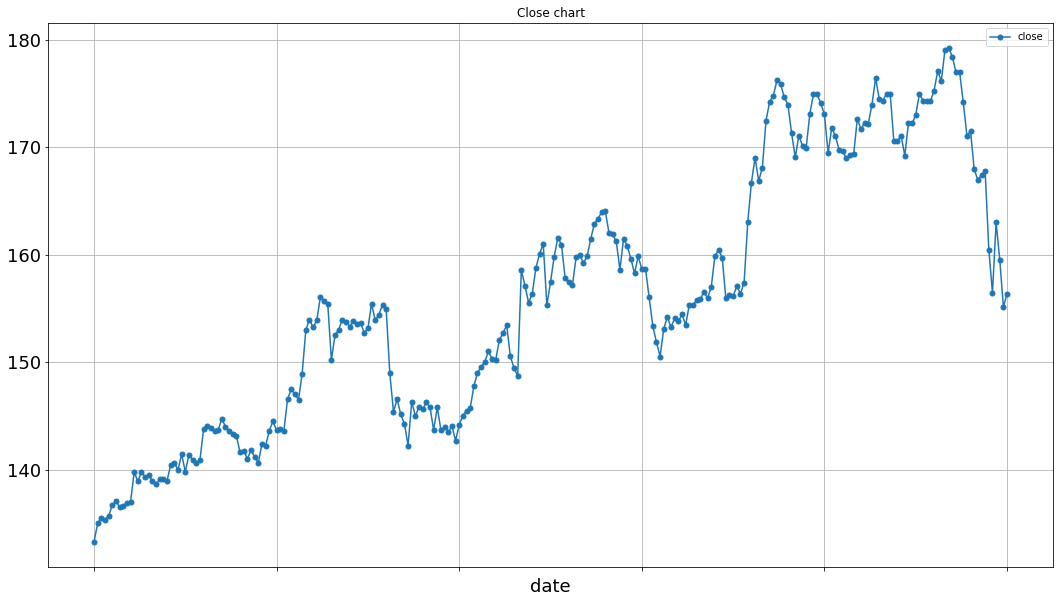

In [16]:
# setup chart format
ax = df[["close"]].plot.line(grid='true', figsize=(18,10), title='Close chart', marker=".", markersize=10, fontsize=18)
ax.set_xlabel('date', fontsize=18)

# An advanced candlestick chart

In [17]:
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime

In [18]:
trace = go.Candlestick(x=df.index, open=df.open, high=df.high, low=df.low, close=df.close)

In [19]:
data = [trace]
layout = {
    'title': 'The Great Recession',
    'yaxis': {'title': 'AAPL Stock'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2016-12-09', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Increase Period Begins'
    }]
}

the following scripts will create an online chart which you can share with friends very easily.

In [20]:
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='appl-recession-candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~michael.zh/0 or inside your plot.ly account where it is named 'appl-recession-candlestick'


If you want just show as an offline picture, this is how.

In [22]:
import plotly
plotly.offline.init_notebook_mode(connected=True) 
plotly.offline.iplot(fig)